In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path

import cv2

from keras import models
from keras import layers
from keras import losses
from keras import optimizers
from keras import initializers

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
def get_model(number_of_layers=2, dilation_rate=1, stride=1, dropout_p=0.5, optimizer=optimizers.Adam, learning_rate=0.001, loss_function=losses.binary_crossentropy, initializer='glorot_uniform', normalization=None):
    
    model = models.Sequential()
  
    c_unit = 32
    for n in range(0, number_of_layers, 1):
        if n==0:
            model.add(layers.Conv2D(c_unit, (3, 3), strides=(stride, stride), dilation_rate=(dilation_rate, dilation_rate), activation='relu', input_shape=(28, 28, 1), kernel_initializer=initializer, bias_initializer=initializer))
            if normalization=='batch':
                model.add(layers.BatchNormalization(beta_initializer=initializers.zeros(), gamma_initializer=initializers.ones(), moving_mean_initializer=initializers.zeros(), moving_variance_initializer=initializers.ones()))
            model.add(layers.MaxPooling2D((2, 2)))
            if normalization=='batch':
                model.add(layers.BatchNormalization(beta_initializer=initializers.zeros(), gamma_initializer=initializers.ones(), moving_mean_initializer=initializers.zeros(), moving_variance_initializer=initializers.ones()))
            model.add(layers.Dropout(dropout_p, seed=2020))
            if normalization=='batch':
                model.add(layers.BatchNormalization(beta_initializer=initializers.zeros(), gamma_initializer=initializers.ones(), moving_mean_initializer=initializers.zeros(), moving_variance_initializer=initializers.ones()))
        else:
            model.add(layers.Conv2D(c_unit, (3, 3), strides=(stride, stride), dilation_rate=(dilation_rate, dilation_rate), activation='relu', kernel_initializer=initializer, bias_initializer=initializer))
            if normalization=='batch':
                model.add(layers.BatchNormalization(beta_initializer=initializers.zeros(), gamma_initializer=initializers.ones(), moving_mean_initializer=initializers.zeros(), moving_variance_initializer=initializers.ones()))
            model.add(layers.MaxPooling2D((2, 2)))
            if normalization=='batch':
                model.add(layers.BatchNormalization(beta_initializer=initializers.zeros(), gamma_initializer=initializers.ones(), moving_mean_initializer=initializers.zeros(), moving_variance_initializer=initializers.ones()))
            model.add(layers.Dropout(dropout_p, seed=2020))
            if normalization=='batch':
                model.add(layers.BatchNormalization(beta_initializer=initializers.zeros(), gamma_initializer=initializers.ones(), moving_mean_initializer=initializers.zeros(), moving_variance_initializer=initializers.ones()))
        c_unit *= 2
        
    model.add(layers.Flatten())

    d_unit = 64
    for n in range(0, number_of_layers, 1):
        if n!=number_of_layers-1:
            model.add(layers.Dense(d_unit, activation='relu', kernel_initializer=initializer, bias_initializer=initializer))
            if normalization=='batch':
                model.add(layers.BatchNormalization(beta_initializer=initializers.zeros(), gamma_initializer=initializers.ones(), moving_mean_initializer=initializers.zeros(), moving_variance_initializer=initializers.ones()))
        else:
            model.add(layers.Dense(1, activation='sigmoid'))
        d_unit //= 2

    opt = optimizer(learning_rate=learning_rate)
    model.compile(loss=loss_function, optimizer=opt, metrics=['accuracy'])
    
    model.summary()

    return model

In [3]:
def show_plot(history):
    history_dict = history.history
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    epoches = range(1, len(acc)+1)
    
    plt.plot(epoches, loss, 'bo', label='Training Loss')
    plt.plot(epoches, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoches')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()

    plt.plot(epoches, acc, 'bo', label='Training Accuracy')
    plt.plot(epoches, val_acc, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoches')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

images = list()
labels = list()

images.extend(train_images)
labels.extend(train_labels)

images.extend(test_images)
labels.extend(test_labels)

labels = [0 if label%2==0 else 1 for label in labels]

df = pd.DataFrame()
df['images'] = images
df['labels'] = labels

train_ratio = 55/70
validation_ratio = 10/70
test_ratio = 5/70

train, validation, test = np.split(df.sample(frac=1, random_state=2020), [int(train_ratio * len(images)), int((train_ratio + validation_ratio) * len(images))])

train_images, train_labels = train['images'].to_numpy(), train['labels'].to_numpy()
validation_images, validation_labels = validation['images'].to_numpy(), validation['labels'].to_numpy()
test_images, test_labels = test['images'].to_numpy(), test['labels'].to_numpy()

train_images = np.asarray([np.asarray(img) for img in train_images])
validation_images = np.asarray([np.asarray(img) for img in validation_images])
test_images = np.asarray([np.asarray(img) for img in test_images])

train_images = train_images.reshape((55000,28,28,1))
validation_images = validation_images.reshape((10000,28,28,1))
test_images = test_images.reshape((5000,28,28,1))

train_images = train_images.astype('float32')
validation_images = validation_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255.0
validation_images /= 255.0
test_images /= 255.0


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

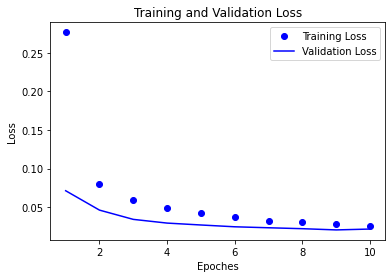

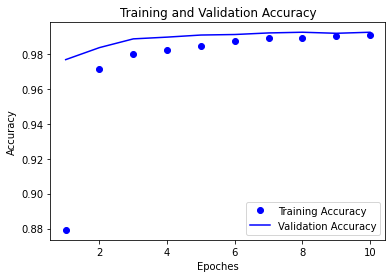

5000/5000 [==============================] - 1s 229us/step
Training data - (loss, accuracy) : (0.010357376720768993 , 0.9969454407691956)
Validation data - (loss, accuracy) : (0.021694011484645306 , 0.9925000071525574)
Testing data - (loss, accuracy) : (0.019028786597773434 , 0.9937999844551086)


In [5]:
model = None

if path.exists('MODELS/model_q1'):
    model = models.load_model('MODELS/model_q1')
else:
    model = get_model(number_of_layers=2, dilation_rate=1, stride=1, dropout_p=0.5, optimizer=optimizers.Adam, learning_rate=0.001, loss_function=losses.binary_crossentropy, initializer='he_uniform', normalization=None)
    history = model.fit(train_images, train_labels, batch_size=64, epochs=10, verbose=1, validation_data=(validation_images, validation_labels))
    show_plot(history)
    model.save('MODELS/model_q1')

train_loss, train_acc = model.evaluate(train_images, train_labels)
validation_loss, validation_acc = model.evaluate(validation_images, validation_labels)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Training data - (loss, accuracy) : ({train_loss} , {train_acc})')
print(f'Validation data - (loss, accuracy) : ({validation_loss} , {validation_acc})')
print(f'Testing data - (loss, accuracy) : ({test_loss} , {test_acc})')

In [5]:
model_parameters = [
    [2, 1, 1, 0.5, optimizers.Adam, 0.001, losses.binary_crossentropy, 'he_uniform', None],
    [3, 1, 1, 0.5, optimizers.Adam, 0.001, losses.binary_crossentropy, 'he_uniform', None],
    [2, 2, 1, 0.5, optimizers.Adam, 0.001, losses.binary_crossentropy, 'he_uniform', None],
    [2, 1, 2, 0.5, optimizers.Adam, 0.001, losses.binary_crossentropy, 'he_uniform', None],
    [2, 1, 1, 0.5, optimizers.SGD, 0.001, losses.binary_crossentropy, 'he_uniform', None],
    [2, 1, 1, 0.5, optimizers.RMSprop, 0.001, losses.binary_crossentropy, 'he_uniform', None],
    [2, 1, 1, 0.5, optimizers.Adam, 0.001, losses.mean_squared_error, 'he_uniform', None],
    [2, 1, 1, 0.25, optimizers.Adam, 0.001, losses.binary_crossentropy, 'he_uniform', None],
    [2, 1, 1, 0.5, optimizers.Adam, 0.01, losses.binary_crossentropy, 'he_uniform', None],
    [2, 1, 1, 0.5, optimizers.Adam, 0.1, losses.binary_crossentropy, 'he_uniform', None],
    [2, 1, 1, 0.5, optimizers.Adam, 0.001, losses.binary_crossentropy, 'he_uniform', 'batch'],
    [2, 1, 1, 0.5, optimizers.Adam, 0.001, losses.binary_crossentropy, 'glorot_uniform', None],
]

losses = []
accuracies = []

for i in range(0, len(model_parameters)):
    index = i
    print(f'model-{index} =================================================>>>>>>>>>>>>')
    paras = model_parameters[index]
    
    if path.exists(f'MODELS/model{index}_q2'):
        model = models.load_model(f'MODELS/model{index}_q2')
    else:
        model = get_model(number_of_layers=paras[0], dilation_rate=paras[1], stride=paras[2], dropout_p=paras[3], optimizer=paras[4], learning_rate=paras[5], loss_function=paras[6], initializer=paras[7], normalization=paras[8])
        history = model.fit(train_images, train_labels, batch_size=64, epochs=10, verbose=1, validation_data=(validation_images, validation_labels))
        show_plot(history)
        model.save(f'MODELS/model{index}_q2')
  
    train_loss, train_acc = model.evaluate(train_images, train_labels)
    validation_loss, validation_acc = model.evaluate(validation_images, validation_labels)
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    
    print(f'Training data - (loss, accuracy) : ({train_loss} , {train_acc})')
    print(f'Validation data - (loss, accuracy) : ({validation_loss} , {validation_acc})')
    print(f'Testing data - (loss, accuracy) : ({test_loss} , {test_acc})')

    losses.append(test_loss)
    accuracies.append(test_acc)

model_number = np.argmax(accuracies)
print('Best Validation Model\'s number : ', model_number)

model-0 =================================================>>>>>>>>>>>>
5000/5000 [==============================] - 2s 317us/step
Training data - (loss, accuracy) : (0.010276111710507591 , 0.9969454407691956)
Validation data - (loss, accuracy) : (0.020842380492109805 , 0.9933000206947327)
Testing data - (loss, accuracy) : (0.018032204249314964 , 0.9944000244140625)
model-1 =================================================>>>>>>>>>>>>
5000/5000 [==============================] - 2s 319us/step
Training data - (loss, accuracy) : (0.03988109018396248 , 0.9889272451400757)
Validation data - (loss, accuracy) : (0.04674166419655085 , 0.9851999878883362)
Testing data - (loss, accuracy) : (0.04024459846019745 , 0.9887999892234802)
model-2 =================================================>>>>>>>>>>>>
5000/5000 [==============================] - 2s 386us/step
Training data - (loss, accuracy) : (0.014623942727307705 , 0.9956545233726501)
Validation data - (loss, accuracy) : (0.024715870844386516 , 

(test_image_file : i0.jpg)-(digit : 0)-(actual : EVEN)-(prediction : [0.3677864968776703 , EVEN])
(test_image_file : i1.jpg)-(digit : 1)-(actual : ODD)-(prediction : [0.99037104845047 , ODD])
(test_image_file : i2.jpg)-(digit : 2)-(actual : EVEN)-(prediction : [0.05503886938095093 , EVEN])
(test_image_file : i3.jpg)-(digit : 3)-(actual : ODD)-(prediction : [0.992933988571167 , ODD])
(test_image_file : i4.jpg)-(digit : 4)-(actual : EVEN)-(prediction : [0.014066331088542938 , EVEN])
(test_image_file : i5.jpg)-(digit : 5)-(actual : ODD)-(prediction : [0.9995754361152649 , ODD])
(test_image_file : i6.jpg)-(digit : 6)-(actual : EVEN)-(prediction : [0.03467428311705589 , EVEN])
(test_image_file : i7.jpg)-(digit : 7)-(actual : ODD)-(prediction : [0.9840235710144043 , ODD])
(test_image_file : i8.jpg)-(digit : 8)-(actual : EVEN)-(prediction : [0.2994788587093353 , EVEN])
(test_image_file : i9.jpg)-(digit : 9)-(actual : ODD)-(prediction : [0.6563121676445007 , ODD])


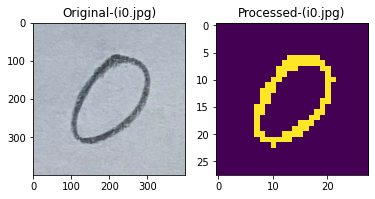

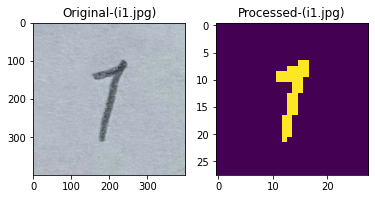

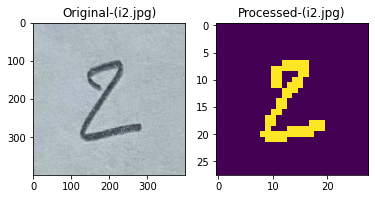

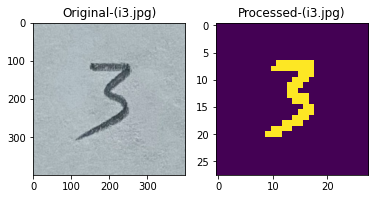

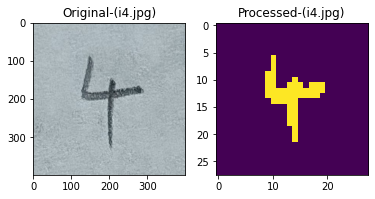

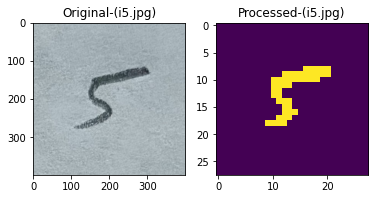

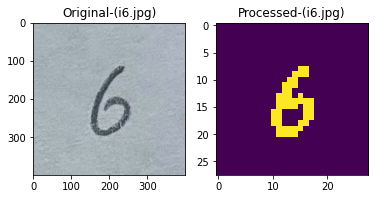

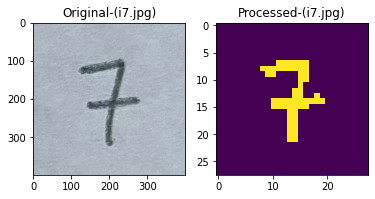

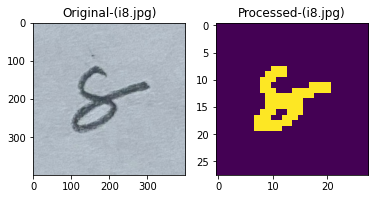

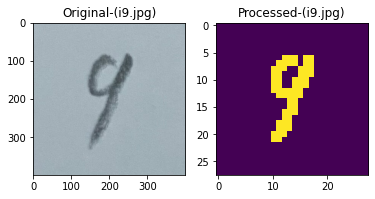

In [7]:
best_model_index = 0
best_model = models.load_model(f'MODELS/model{best_model_index}_q2')

test_image_files = ['i0.jpg', 'i1.jpg', 'i2.jpg', 'i3.jpg', 'i4.jpg', 'i5.jpg', 'i6.jpg', 'i7.jpg', 'i8.jpg', 'i9.jpg']
unprocessed_test_images = []
unprocessed_test_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for test_image_file in test_image_files:
    unprocessed_test_images.append(cv2.imread(f'handwritten-digit/{test_image_file}'))

for index in range(0, len(unprocessed_test_labels), 1):
    test_image_file = test_image_files[index]
    unprocessed_test_image = unprocessed_test_images[index]
    unprocessed_test_label = unprocessed_test_labels[index]

    resized_test_image = cv2.resize(unprocessed_test_image, (28,28), interpolation=cv2.INTER_AREA)
    grayscaled_test_image = cv2.cvtColor(resized_test_image, cv2.COLOR_BGR2GRAY)
    smoothed_test_image = cv2.GaussianBlur(grayscaled_test_image, (3,3), 3/5, 3/5)
#     binary_test_image = cv2.adaptiveThreshold(smoothed_test_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,9,6)
    threshold, binary_test_image = cv2.threshold(smoothed_test_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    processed_test_image = binary_test_image

    fig = plt.figure()
    
    splot1 = fig.add_subplot(1,2,1)
    splot1.set_title(f'Original-({test_image_file})')
    splot1.imshow(unprocessed_test_image)
    
    splot2 = fig.add_subplot(1,2,2)
    splot2.set_title(f'Processed-({test_image_file})')
    splot2.imshow(processed_test_image)

    processed_test_image = np.asarray([np.asarray(processed_test_image)])
    processed_test_label = 0 if unprocessed_test_label%2==0 else 1

    processed_test_image = processed_test_image.reshape((1,28,28,1))
    processed_test_image = processed_test_image.astype('float32')
    processed_test_image /= 255.0

    processed_test_image_result = best_model.predict(processed_test_image)
    processed_test_image_result = processed_test_image_result[0][0]
    actual_test_image_result = 'EVEN' if processed_test_label==0 else 'ODD'
    prediction_test_image_result = 'EVEN' if processed_test_image_result < 0.5 else 'ODD'
    print(f'(test_image_file : {test_image_file})-(digit : {unprocessed_test_label})-(actual : {actual_test_image_result})-(prediction : [{processed_test_image_result} , {prediction_test_image_result}])')